In [191]:
from call_functions import *
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets

In [234]:
def S(omega,U_10,gamma):
    g = 9.81
    F = 1e5
    alpha = 0.076 * ((U_10**2/(F*g))**(0.22))
    omega_p = 22 * (((g**2)/(U_10*F))**(1/3))
    sigma = 0.07 * (omega <= omega_p) + 0.09 * (omega > omega_p)
    r = np.exp(-((omega - omega_p)**2)/(2 * (sigma**2) * (omega_p**2)))
    Sw = (alpha * (g**2))/(omega**5) * np.exp( - (5/4)*((omega_p/omega)**4))*(gamma**r)
    return Sw

In [235]:
x = np.linspace(0,4,1000)

/var/folders/vb/z01wks0d25n399v1c2rv_r6000mb9z/T/ipykernel_10820/862250434.py:8: RuntimeWarning: divide by zero encountered in divide
  Sw = (alpha * (g**2))/(omega**5) * np.exp( - (5/4)*((omega_p/omega)**4))*(gamma**r)
/var/folders/vb/z01wks0d25n399v1c2rv_r6000mb9z/T/ipykernel_10820/862250434.py:8: RuntimeWarning: invalid value encountered in multiply
  Sw = (alpha * (g**2))/(omega**5) * np.exp( - (5/4)*((omega_p/omega)**4))*(gamma**r)


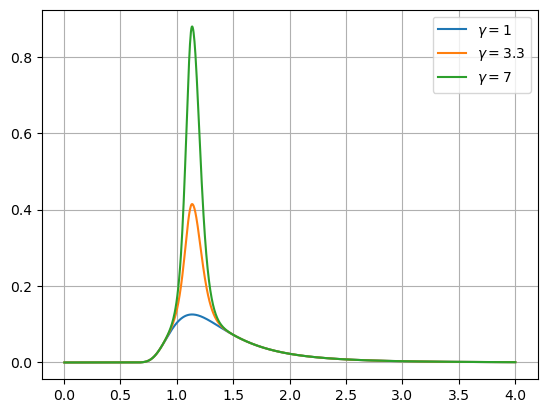

In [236]:
plt.plot(x,S(x,7,1),label=f'$\gamma = 1$')
plt.plot(x,S(x,7,3.3),label=f'$\gamma = 3.3$')
plt.plot(x,S(x,7,7),label=f'$\gamma = 7$')
plt.grid()
plt.legend()
plt.show()

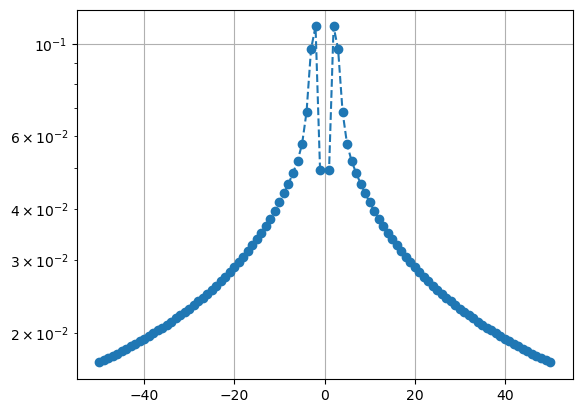

In [237]:
nb_freqs = 50
g = 9.81
h = 10
xi = np.arange(-nb_freqs,nb_freqs+1)
xi = xi[abs(xi)>0]
omega_2 = np.sqrt(g*np.abs(xi))
omega   = np.sign(xi) * np.sqrt(omega_2)
A = np.sqrt(2 * S(abs(omega),1,3.3))
plt.semilogy(xi,A,'o--')
plt.grid()
#print(A)

In [246]:
def eta(xspace,t,nb_freqs,U_10=7):
    g        = 9.81

    xi = np.arange(-nb_freqs,nb_freqs+1)
    xi = xi[abs(xi)>0]
    omega_2 = np.sqrt(g*np.abs(xi))
    omega   = np.sign(xi) * np.sqrt(omega_2)
    theta  = np.outer(xi,xspace) - np.outer(omega,t)
    A = np.sqrt(2 * S(abs(omega),U_10,3.3))

    eta_s = (np.sum(omega.reshape((2*nb_freqs,1))*(-g*(A.reshape((2*nb_freqs,1))*np.sin(theta))),0))

    return eta_s

In [266]:
nx = 2**8
n_freqs = 20
U_10 = 30
xspace = np.linspace(0,2*np.pi,nx)[0:nx-1]
widgets_cell = {}
widgets_cell["t"] = widgets.FloatSlider(min=100, max=110, value=10, description="t")

def plot_solution(**kwargs):
    plt.figure(figsize=(15, 5))
    eta_plot = eta(xspace=xspace,t=kwargs['t'],nb_freqs=n_freqs,U_10=U_10)
    plt.plot(xspace,eta_plot)
    plt.text(1,-50,np.mean(eta_plot))
    plt.ylim(-80,80)
    plt.xlim(0,2*np.pi)
    plt.grid()
    plt.show()

widgets.interactive(plot_solution, **widgets_cell)

interactive(children=(FloatSlider(value=100.0, description='t', max=110.0, min=100.0), Output()), _dom_classes…

In [197]:
np.linspace(0,2*np.pi,3)[0:2]

array([0.        , 3.14159265])

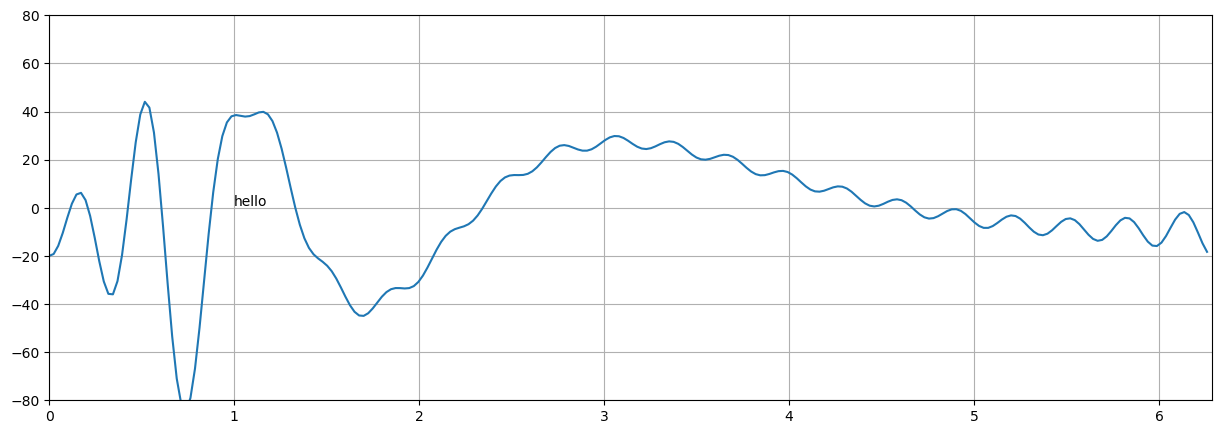

In [261]:
plt.figure(figsize=(15, 5))
plt.text(1,1,'hello')
plt.plot(xspace,eta(xspace=xspace,t=10,nb_freqs=n_freqs,U_10=U_10))
plt.ylim(-80,80)
plt.xlim(0,2*np.pi)
plt.grid()
plt.show()